# The Bias-Variance Trade-off 

> # Gradient Decent to Find Optimal Parameter Values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To illustrate we consider a problem where there is only one paramenter to estimate. We'll look at the value of a hypothetical 
# cost function (y=f(x) = x2 - 2x) and devise a gradient descent procedure to find the value of the parameter x for which the cost
# y is the lowest. Here we choose some x values, create a function that returns the value of the cost function and look at the 
# value of the cost function over this range of parameters

X_poly = np.linspace(-3,5,81)
print(X_poly[:5], "...",X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.5, 1.0, 'Error surface')

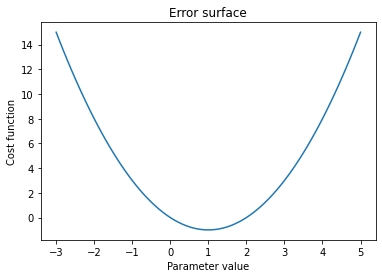

In [3]:
def cost_function(X):
    return X * (X-2)

y_poly = cost_function(X_poly)
plt.plot(X_poly,y_poly)
plt.xlabel("Parameter value")
plt.ylabel("Cost function")
plt.title("Error surface")

# Using the Gradient Descent to Minimize a Cost Function

In [4]:
# In this exercise our task is to find the best set of parameters in order to minimize the following hypothetical cost function
# y = f(x) = x2 - 2x. Following the same steps in the preceeding section

In [5]:
# Create a function for the gradient. This is the analytical derivative of the cost function.

def gradient(X):
    return (2*X) - 2

x_start = 4.5
learning_rate = 0.75
x_next = x_start - gradient(x_start)*learning_rate
x_next

-0.75

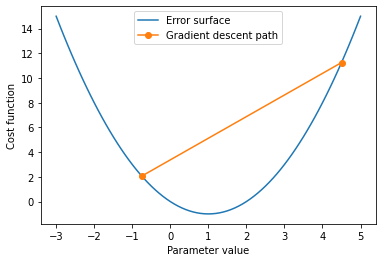

In [6]:
# Plot the gradient descent path, from the starting point to the next point 
plt.plot(X_poly,y_poly)
plt.plot([x_start,x_next],[cost_function(x_start),cost_function(x_next)],"-o")
plt.xlabel("Parameter value")
plt.ylabel("Cost function")
plt.legend(["Error surface","Gradient descent path"])

In [7]:
# Perform 14 iterations to converge toward the local minimum of the cost function by using the following code
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start

for iteration_count in range(1,iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1] - (derivative*learning_rate)
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

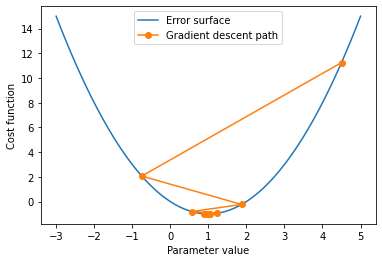

In [8]:
# Plot the gradient descent path using the following code:

plt.plot(X_poly,y_poly)
plt.plot(x_path,cost_function(x_path),"-o")
plt.xlabel("Parameter value")
plt.ylabel("Cost function")
plt.legend(["Error surface","Gradient descent path"])

In [9]:
# Loading the our dataset

df = pd.read_csv("Chapter_1_cleaned_data.csv")

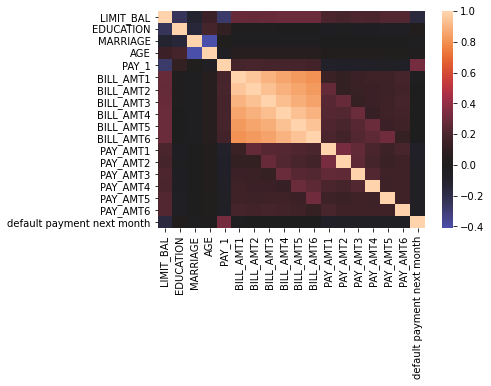

In [10]:
features_response = df.columns.tolist()
items_to_remove = ["ID","SEX","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","EDUCATION_CAT","graduate school","high school","none","others","university"]
features_response = [item for item in features_response if item not in items_to_remove]
corr = df[features_response].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,center=0)


# Generating and Modeling Synthetic Classification Data

In [11]:
# Generating a synthetic dataset to observe overfitting 

# importing the modules

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [12]:
# Generating a dataset with two variables, x_synthetic and y_synthetic, 200 candidate features, and 1000 samples using the 
# following code

X_synthetic,y_synthetic = make_classification(n_samples=1000,n_features=200,n_informative=3,n_redundant=10,n_repeated=0,n_classes=2,n_clusters_per_class=2,weights=None,flip_y=0.01,class_sep=0.8,hypercube=True,shift=0.0,scale=1.0,shuffle=True,random_state=24)
print(X_synthetic.shape,y_synthetic.shape)

(1000, 200) (1000,)


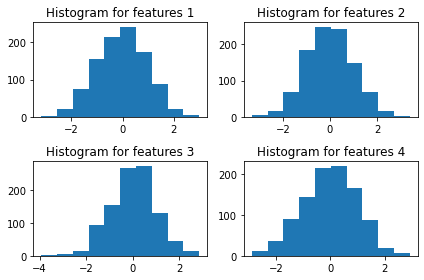

In [13]:
#Plotting the first few features as histograms to show that the range of values is the same using the following code

for plot_index in range(4):
    plt.subplot(2,2,plot_index+1)
    plt.hist(X_synthetic[:,plot_index])
    plt.title("Histogram for features {}".format(plot_index+1))
    plt.tight_layout()

In [14]:
# We have 500 observations in the rarest class, so by that rule we shouldn't have more than 50 features. It's possible that
# with so many feature which we don't have a good idea of the quality of, the model training procedure will overfit.

# Spliting the data into training and testing sets using an 80/20 split, and then instantiate a logistic regression model object
X_syn_train,X_syn_test,y_syn_train,y_syn_test = train_test_split(X_synthetic,y_synthetic,test_size=0.2,random_state=24)
lr_syn = LogisticRegression(solver= "liblinear",penalty="l1",C=1000,random_state=1)
lr_syn.fit(X_syn_train,y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [15]:
# Calculate the training score by first getting the predicted probabilities then obtaining the ROC/AUC

y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train,y_syn_train_predict_proba[:,1])

0.9420000000000001

In [16]:
# Calculate the testing score 

y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test,y_syn_test_predict_proba[:,1])

0.8075807580758075

# Cross Validation: Choosing the Regularization Parameter and Other Hyperparameters


In [17]:
# Scikit-learn provides convenient functions to facilitate cross-validation analyses. These functions play a similar role 
# train_test_split, which we have already been using, although the default behavior is somewhat different. 

#Importing the two classes 

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [19]:
n_folds = 4
k_folds = KFold(n_splits=n_folds,shuffle=False,random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


# Reducing Overfitting on the Synthetic Data Classification Problem

In [20]:
# Vary the value of the regularization parameter C to have it range from C = 1000 to C = 0.001 

# Define the exponents which will be powers of 10 

C_val_exponents = np.linspace(3,-3,13)
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [21]:
# Vary C by the powers of 10

C_vals = np.float(10)**C_val_exponents
C_vals

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [22]:
# Import the ROC curve

from sklearn.metrics import roc_curve

In [26]:
# defining the function that takes k_folds cross-validation splitter

def cross_val_C_search(k_folds,C_vals,model,X,Y):
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds,len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds,len(C_vals)))
    
    #Creating a empty list
    cv_test_roc = [[]] *len(C_vals)
    
    #Creating an outer loop for training and testing each of the k-folds for each value of C
    for c_val_counter in range(len(C_vals)):
        
        #Set the C value for the model object
        model.C = C_vals[c_val_counter]
        
        #Count folds for each value of C
        fold_counter = 0
        
        #Obtaining the training and testing indices for each fold
        for train_index, test_index in k_folds.split(X,Y):
            
            #Index the features and response variable to obtain the training and testing data for this fold
            X_cv_train,X_cv_test = X[train_index],X[test_index]
            y_cv_train,y_cv_test = Y[train_index],Y[test_index]
            
            #The training data for the current fold is then used to train the model
            
            #fit the model on the training data
            
            model.fit(X_cv_train,y_cv_train)
            
            #Obtain the training ROC/AUC score
            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter,c_val_counter] = roc_auc_score(y_cv_train,y_cv_train_predict_proba[:,1])
            
            #Obtain the testing ROC/AUC score
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter,c_val_counter] = roc_auc_score(y_cv_test,y_cv_test_predict_proba[:,1])
            
            #Obtain the testing ROC curves for each fold 
            this_fold_roc = roc_curve(y_cv_test,y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)
            
            # Increament the fold counter
            fold_counter += 1
        print("Done with C = {}".format(lr_syn.C))
    return cv_train_roc_auc,cv_test_roc_auc,cv_test_roc
        
        

In [27]:
# Run the function to search for the C values that we previously defined by using the model and data we were working with in 
# the previous execerise

cv_train_roc_auc,cv_test_roc_auc,cv_test_roc = cross_val_C_search(k_folds,C_vals,lr_syn,X_syn_train,y_syn_train)

Done with C = 1000.0
Done with C = 316.22776601683796
Done with C = 100.0
Done with C = 31.622776601683793
Done with C = 10.0
Done with C = 3.1622776601683795
Done with C = 1.0
Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001


In [29]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('tab10')

Text(0.5, 1.0, 'Cross validation scores for each fold')

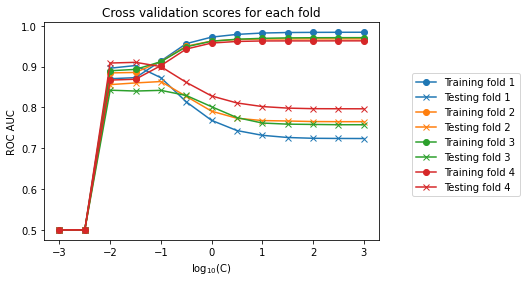

In [31]:
# Loop over each of the folds to view their results individually

for this_fold in range(n_folds):
    plt.plot(C_val_exponents,cv_train_roc_auc[this_fold],"-o",color=cmap(this_fold),label="Training fold {}".format(this_fold+1))
    plt.plot(C_val_exponents,cv_test_roc_auc[this_fold],"-x",color=cmap(this_fold),label="Testing fold {}".format(this_fold+1))
plt.ylabel("ROC AUC")
plt.xlabel("log$_{10}$(C)")
plt.legend(loc=[1.1,0.2])
plt.title("Cross validation scores for each fold")

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

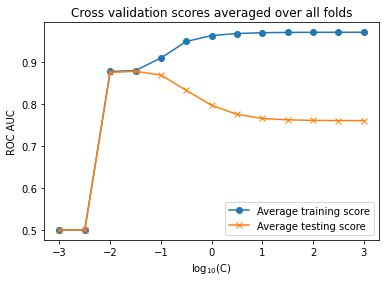

In [32]:
# Plotting the mean of training and testing ROC/AUC scores for each C value 
plt.plot(C_val_exponents,np.mean(cv_train_roc_auc,axis=0),"-o",label="Average training score")
plt.plot(C_val_exponents,np.mean(cv_test_roc_auc,axis=0),"-x",label="Average testing score")
plt.ylabel("ROC AUC")
plt.xlabel("log$_{10}$(C)")
plt.legend()
plt.title("Cross validation scores averaged over all folds")

In [34]:
# Use a boolean array to find the index where C = 10-1.5 and convert to an integer data type 

best_C_val_bool = C_val_exponents == -1.5

print(best_C_val_bool)

best_C_val_bool.astype(int)

[False False False False False False False False False  True False False
 False]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [35]:
# Convert the integer version of the boolean array into a single integer index using the nonzero function

best_C_val_ix = np.nonzero(best_C_val_bool.astype(int))
best_C_val_ix

(array([9], dtype=int64),)

In [36]:
# This is the C value we wish to use 

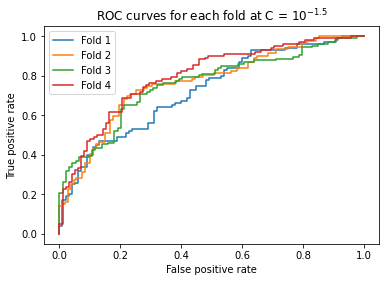

In [37]:
#Access the true and false positive rates in order to plot the ROC curves for each fold

for this_fold in range(n_folds):
    fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
    tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
    plt.plot(fpr, tpr, label='Fold {}'.format(this_fold+1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C = $10^{-1.5}$')
plt.legend()

In [38]:
# Train the logistic regression on all the training data from our synthetic problem and compare the training and testing scores
# using the held-out test set as shown in the following steps.

In [40]:
# Set the C value and train the model on all the training data 
lr_syn.C= 10**(-1.5)
lr_syn.fit(X_syn_train,y_syn_train)

LogisticRegression(C=0.03162277660168379, penalty='l1', random_state=1,
                   solver='liblinear')

In [41]:
# Obtain predicted probabilties and the ROC AUC score for the training data 

y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.8802812499999999

In [42]:
# Obtain predicted probabilities and the ROC AUC score for the testing data

y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8847884788478848

In [43]:
# Access the coefficients of the trained model and determine how many do not equal zero (!=0)

sum((lr_syn.coef_ != 0)[0])

2

In [44]:
# Examine the value of the intercept 

lr_syn.intercept_

array([0.])